In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint ,  solve_ivp
import datetime

In [165]:
g_y=1.24e6   ##Hz
omega_0=4.45e15 ##Hz
del_omega=1e8
omega_1=omega_0-del_omega ##Hz
ohm=1e6         ##Hz
g_z0=0
g_z1=(20*ohm)**0.5
delta_0=100*ohm
N0=1e1

g_y/=ohm
g_z1/=ohm
g_z0/=ohm
omega_1/=ohm
omega_0/=ohm
del_omega/=ohm

In [6]:
from sys import platform

if platform == "darwin":
    folder="/Users/sjha/Documents/Github/new_model_data/"  ## mac
if platform == "win32":
    folder="C:\\Users\\jhash\\Documents\\renders\\opto\\" ## windows

print(folder)


C:\Users\jhash\Documents\renders\opto\


N0= 12499.999999999998


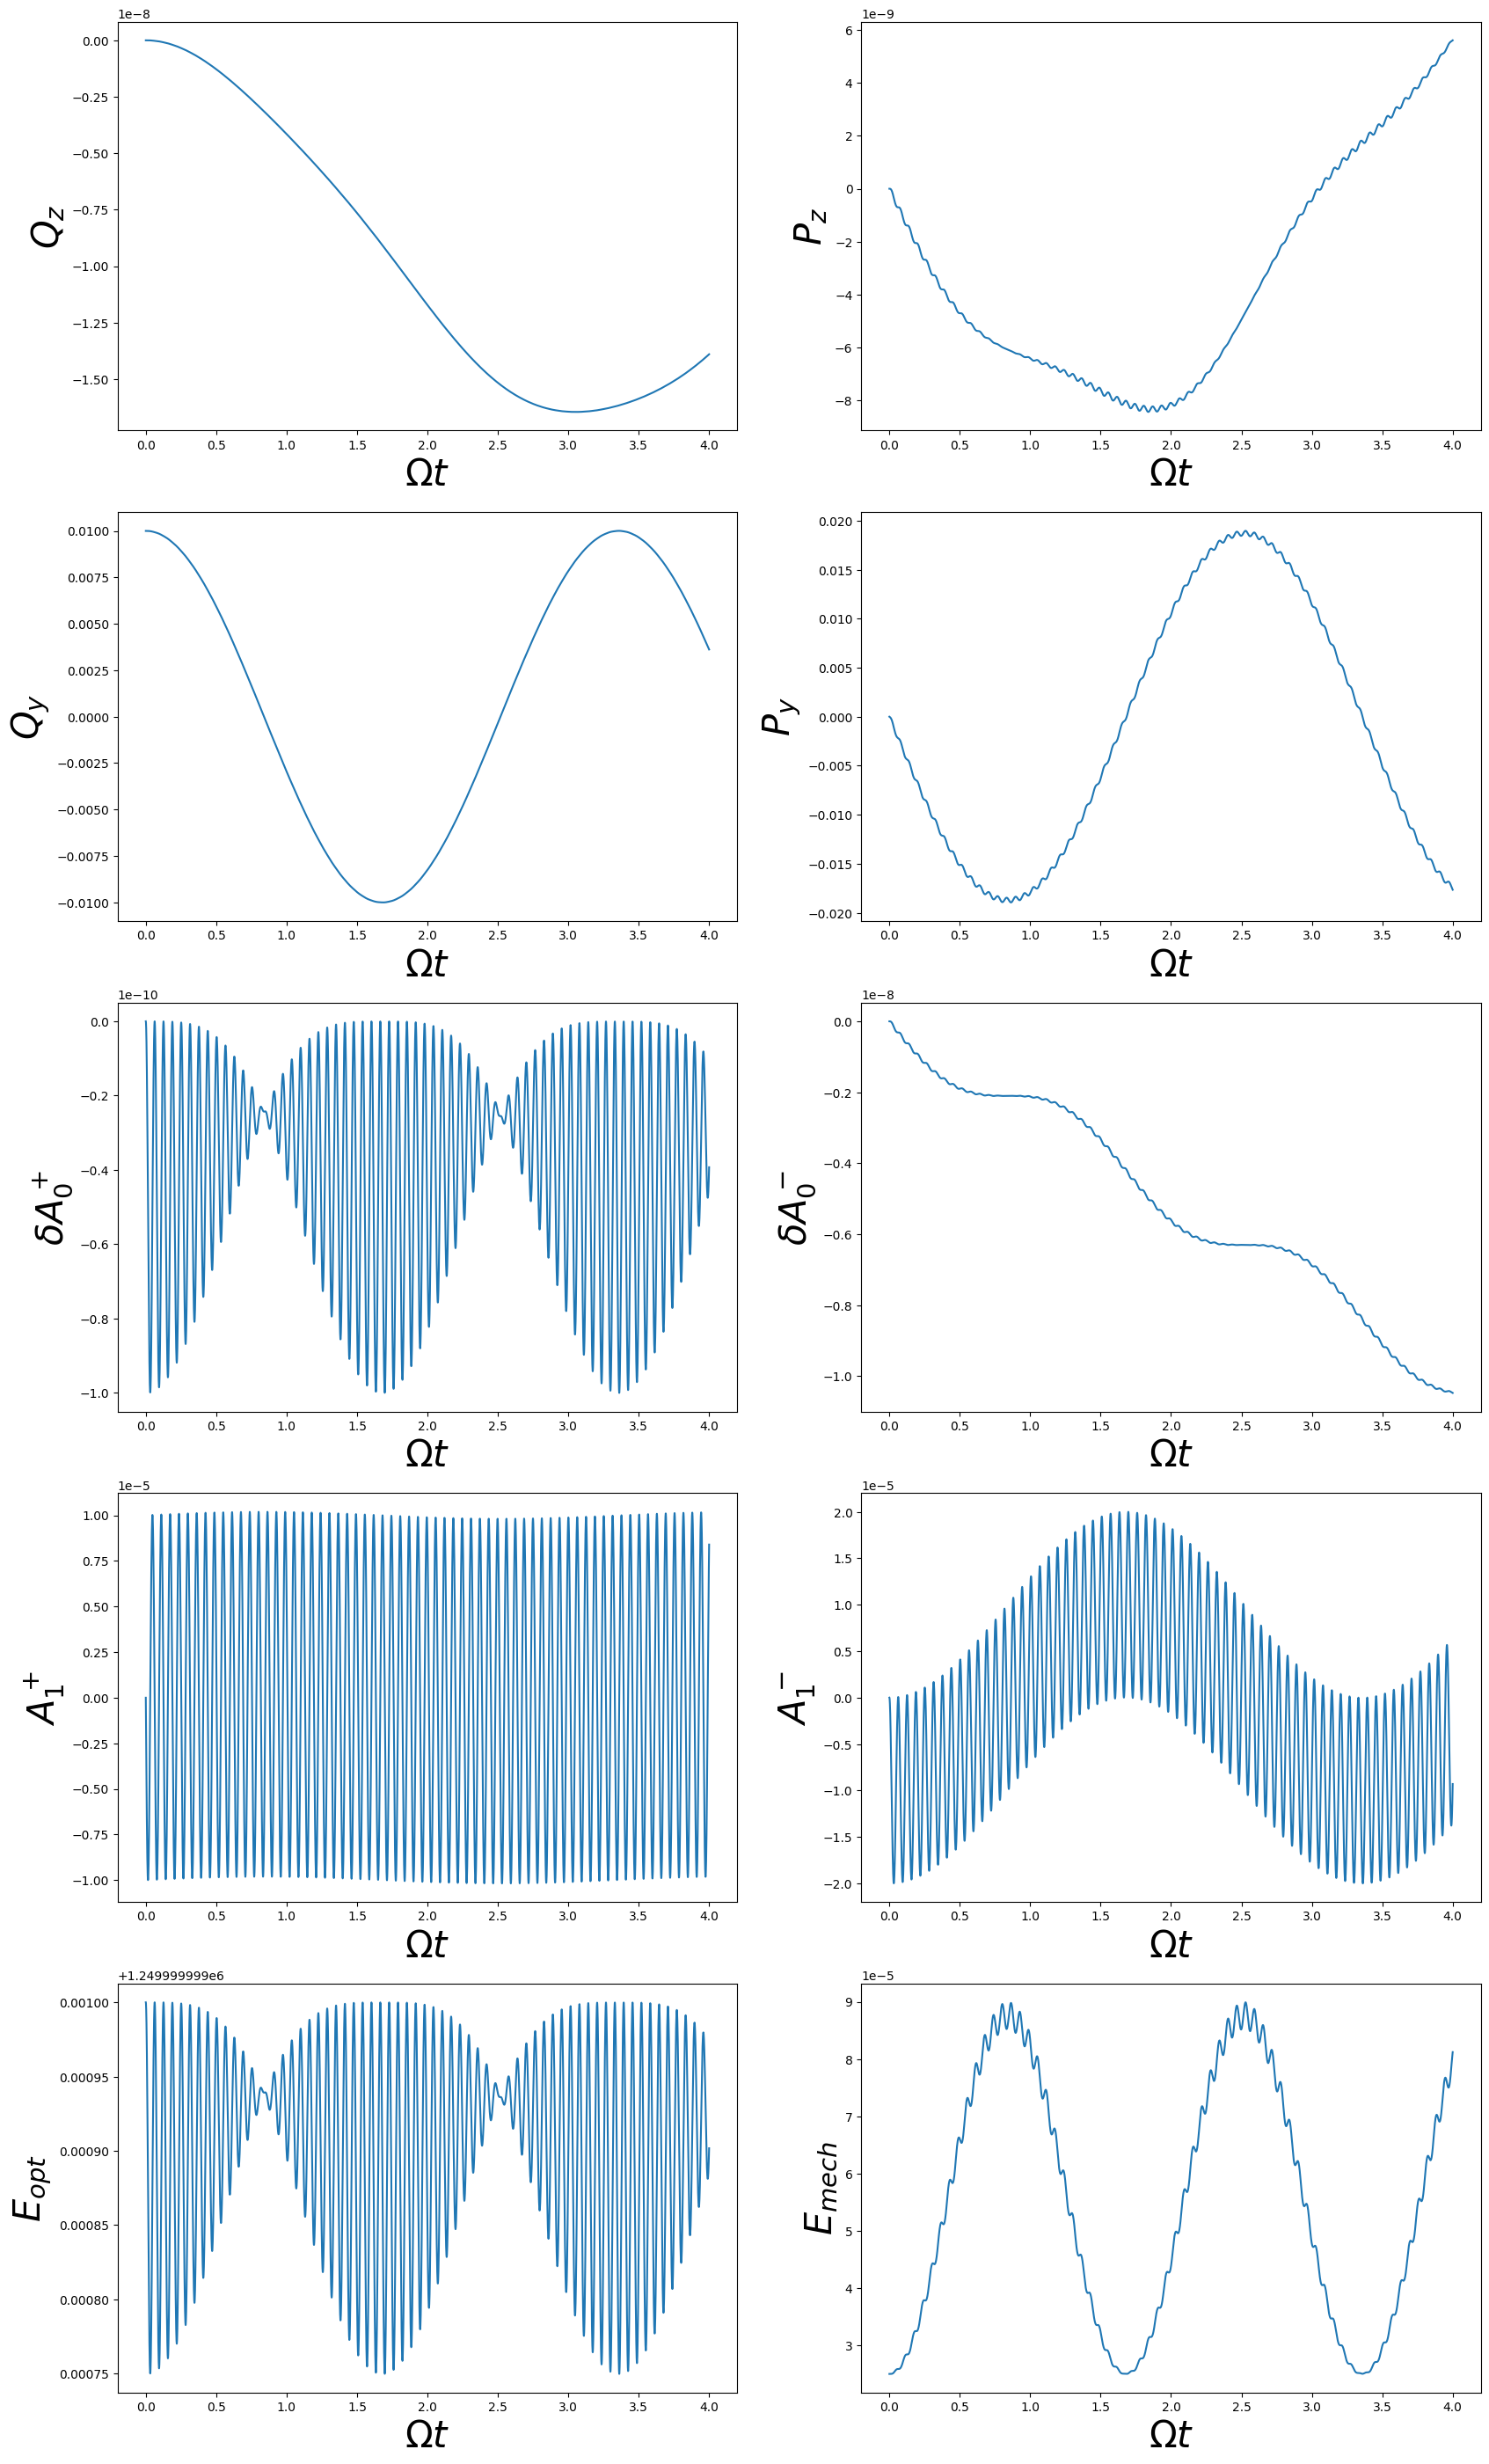

In [178]:
tf=4e0
P_c=0.1 ############### CRITICAL parameter
g_y=1e-1
N0=(P_c*del_omega)**3/(8*g_y**2)
print("N0=",N0)

title='$g_y={0}\Omega  \: ; \: N_0={1} \: ; \: P_c={2}$'.format(g_y,N0,P_c)
file="real_stable_P_c={0}_g_y={1}_tf={2}".format(P_c,g_y,tf)


fig, axs = plt.subplots(5, 2,figsize=(20,35))
data = np.load(folder+file+".npz")
sol=data['sol']
t=data['t']
label_list=data['label']

for i in range(10):
    axs[i//2,i%2].plot(t,sol[i])
    axs[i//2,i%2].set_ylabel(label_list[i],fontsize=30)
    axs[i//2,i%2].set_xlabel('$\Omega  t$',fontsize=30)
#     axs[i//2,i%2].legend(fontsize=12)
# fig.suptitle("$\\lambda={0} \: ; \:  \\nu={1} \: ; \: P_c={2}$".format(np.round(lam,2),np.round(nu,2),P_c),fontsize=30)
plt.show() 

N0= [12500.]


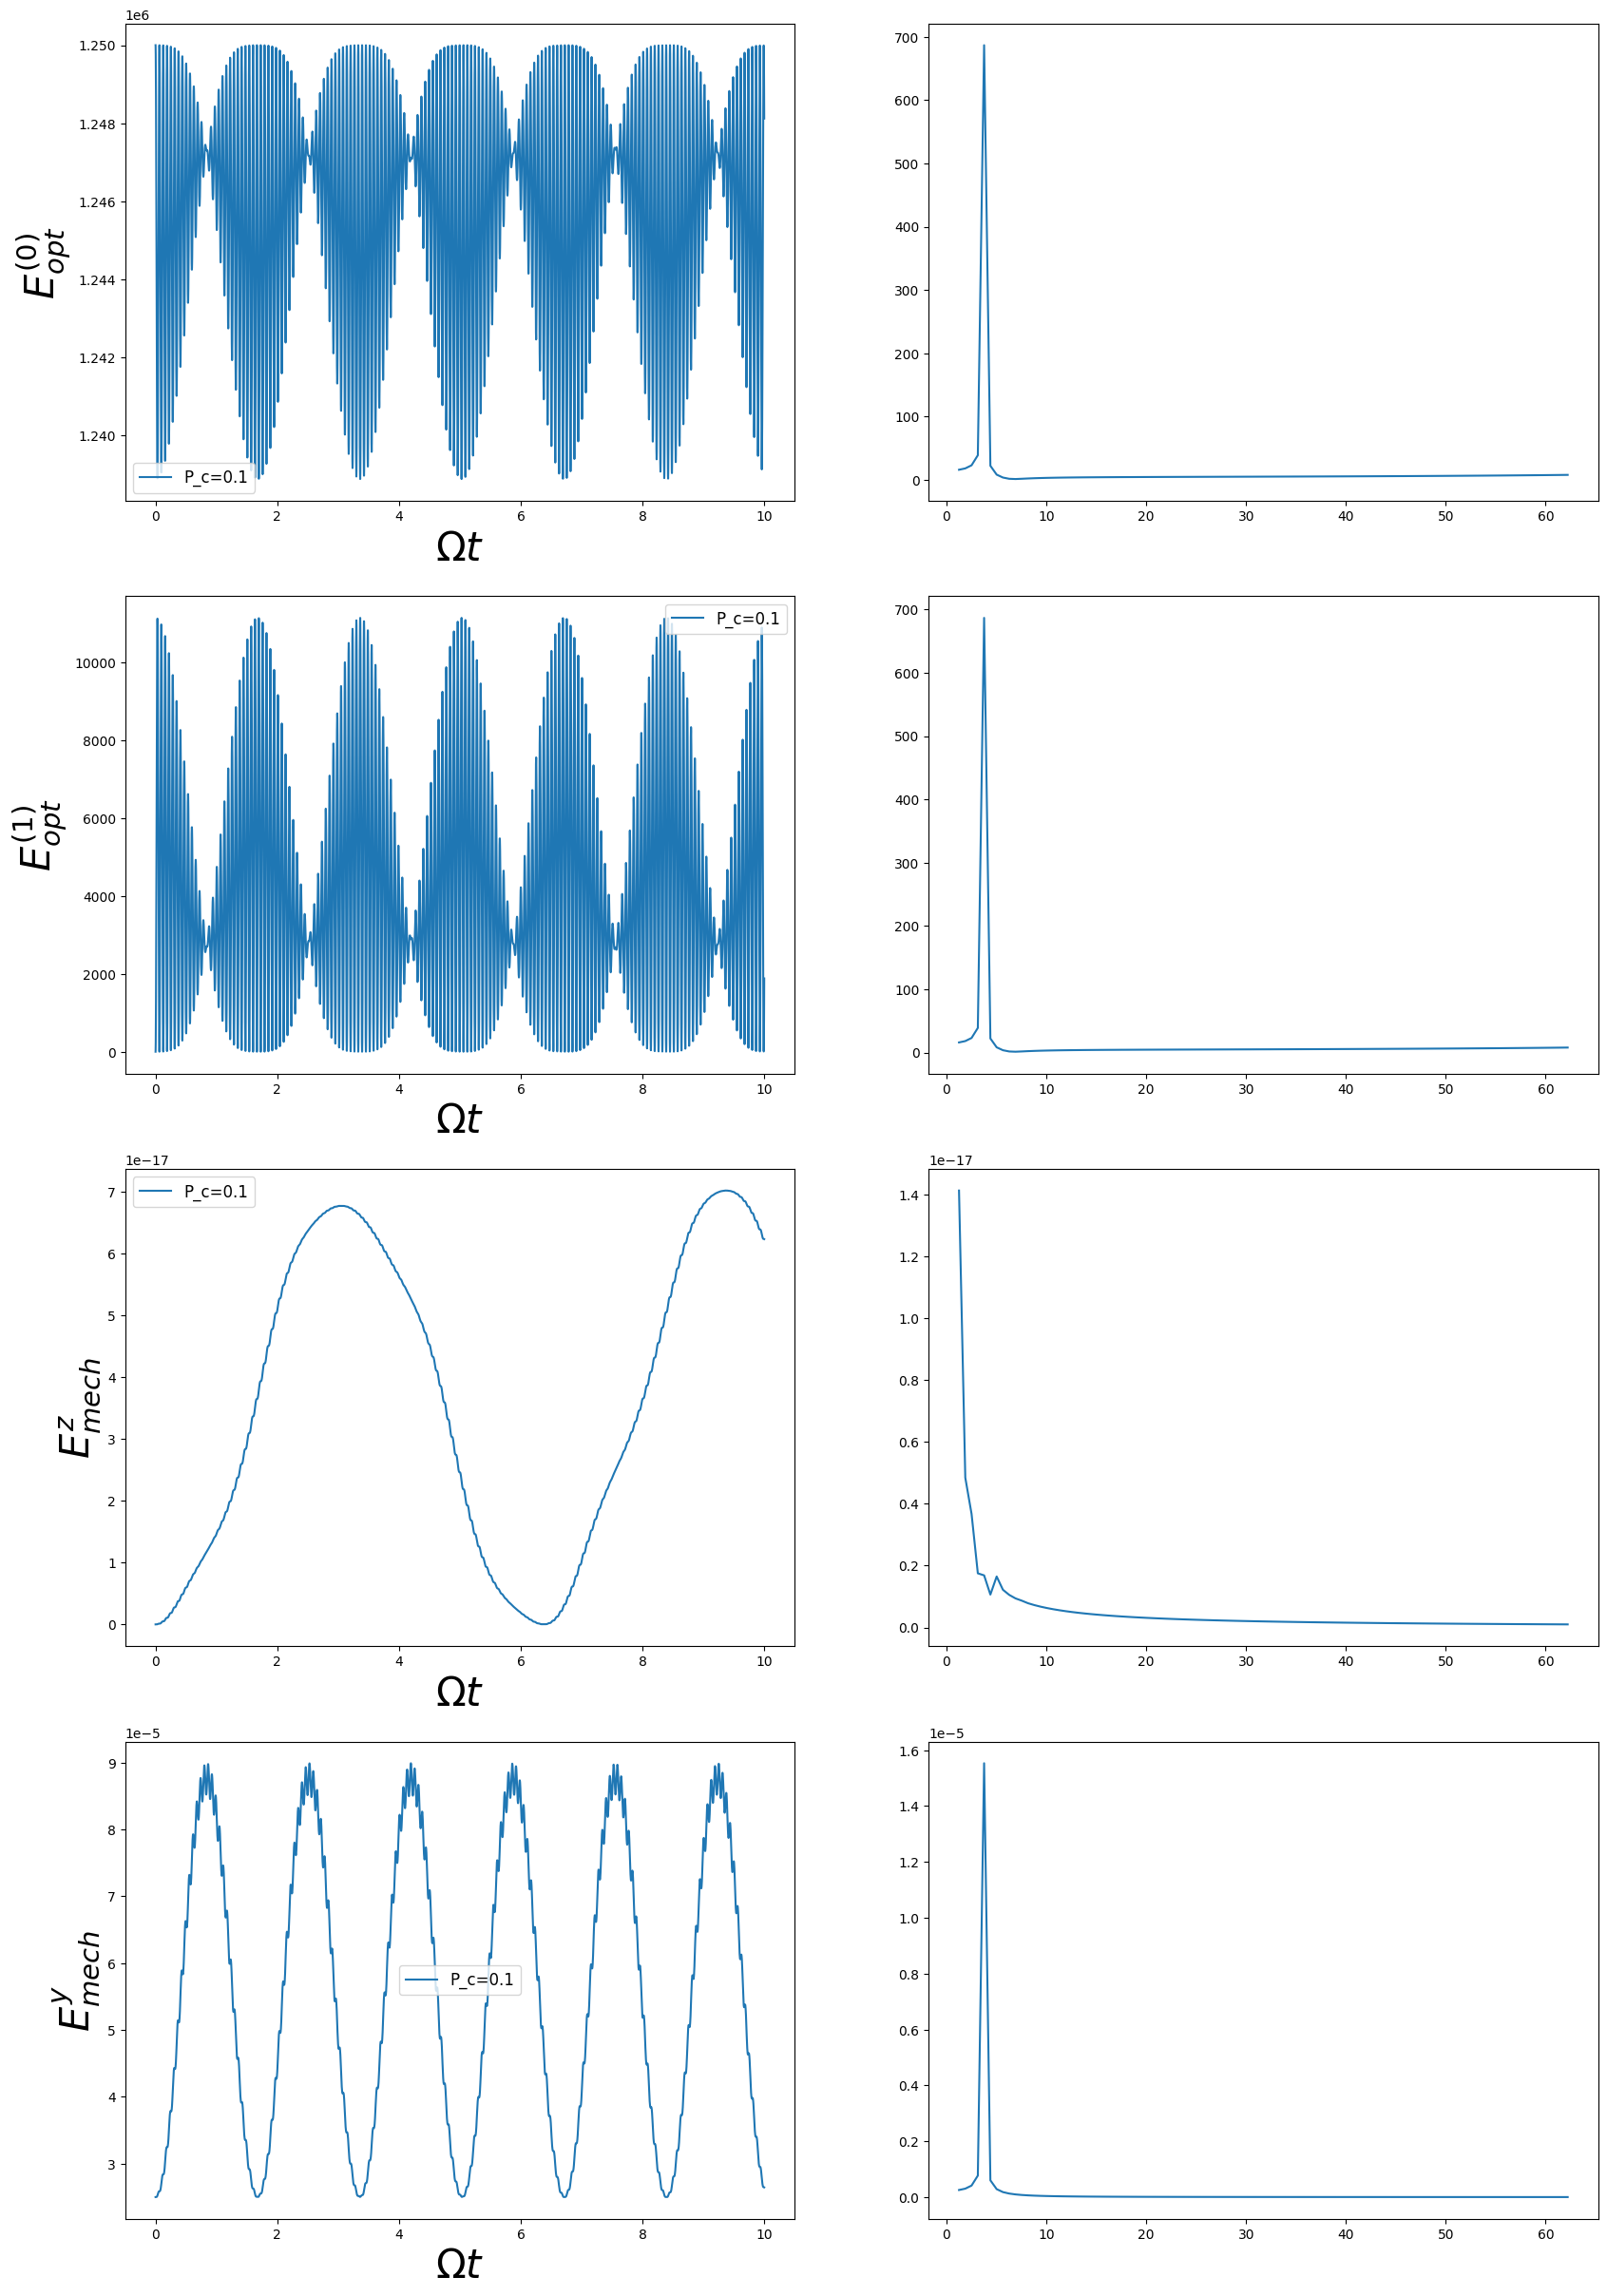

In [181]:
tf=1e1
omega_list=2*np.pi*np.arange(350)/tf

P_c_list=[0.1] ############### CRITICAL parameter
g_y=1e-1
N0_list=(np.array(P_c_list)*del_omega)**3/(8*g_y**2)
print("N0=",N0_list)
title='$g_y={0}\Omega  \: ; \: N_0={1} \: ; \: P_c={2}$'.format(g_y,N0,P_c)
fig, axs = plt.subplots(4, 2,figsize=(20,30))

sf,ef=2,100
for k,P_c in enumerate(P_c_list):
    file="real_stable_P_c={0}_g_y={1}_tf={2}_sep_energy".format(P_c,g_y,tf)
    data = np.load(folder+file+".npz")
    sol=data['sol']
    t=data['t']
    g_z1,g_y,del_omega,N0=data['param']
    N_step=len(t)

    E=[sol[8],sol[9],sol[10],sol[11]]
    label_list=["$E_{opt}^{(0)}$","$E_{opt}^{(1)}$","$E_{mech}^z$","$E_{mech}^y$"]
    omega_list=(2*np.pi*np.arange(L//2+1)/tf)[sf:ef]

    for i in range(4):
        E[i]=(E[i]-0*E[i][0])#/N0
        axs[i,0].plot(t,E[i][:len(t)],label="P_c={0}".format(P_c))
        axs[i,1].plot(omega_list,np.abs(np.fft.rfft(E[i]))[sf:ef]/N_step,label="P_c={0}".format(P_c))


for i in range(4):
    axs[i,0].set_ylabel(label_list[i],fontsize=30)
    axs[i,0].set_xlabel('$\Omega  t$',fontsize=30)
    axs[i,0].legend(fontsize=12)
    axs[i,0].set_ylabel(label_list[i],fontsize=30)
    axs[i,0].set_xlabel('$\Omega  t$',fontsize=30)
    axs[i,0].legend(fontsize=12)

    # fig.suptitle("$\\lambda={0} \: ; \:  \\nu={1} \: ; \: P_c={2}$".format(np.round(lam,2),np.round(nu,2),P_c),fontsize=30)
plt.show() 

N0= 12.499999999999998


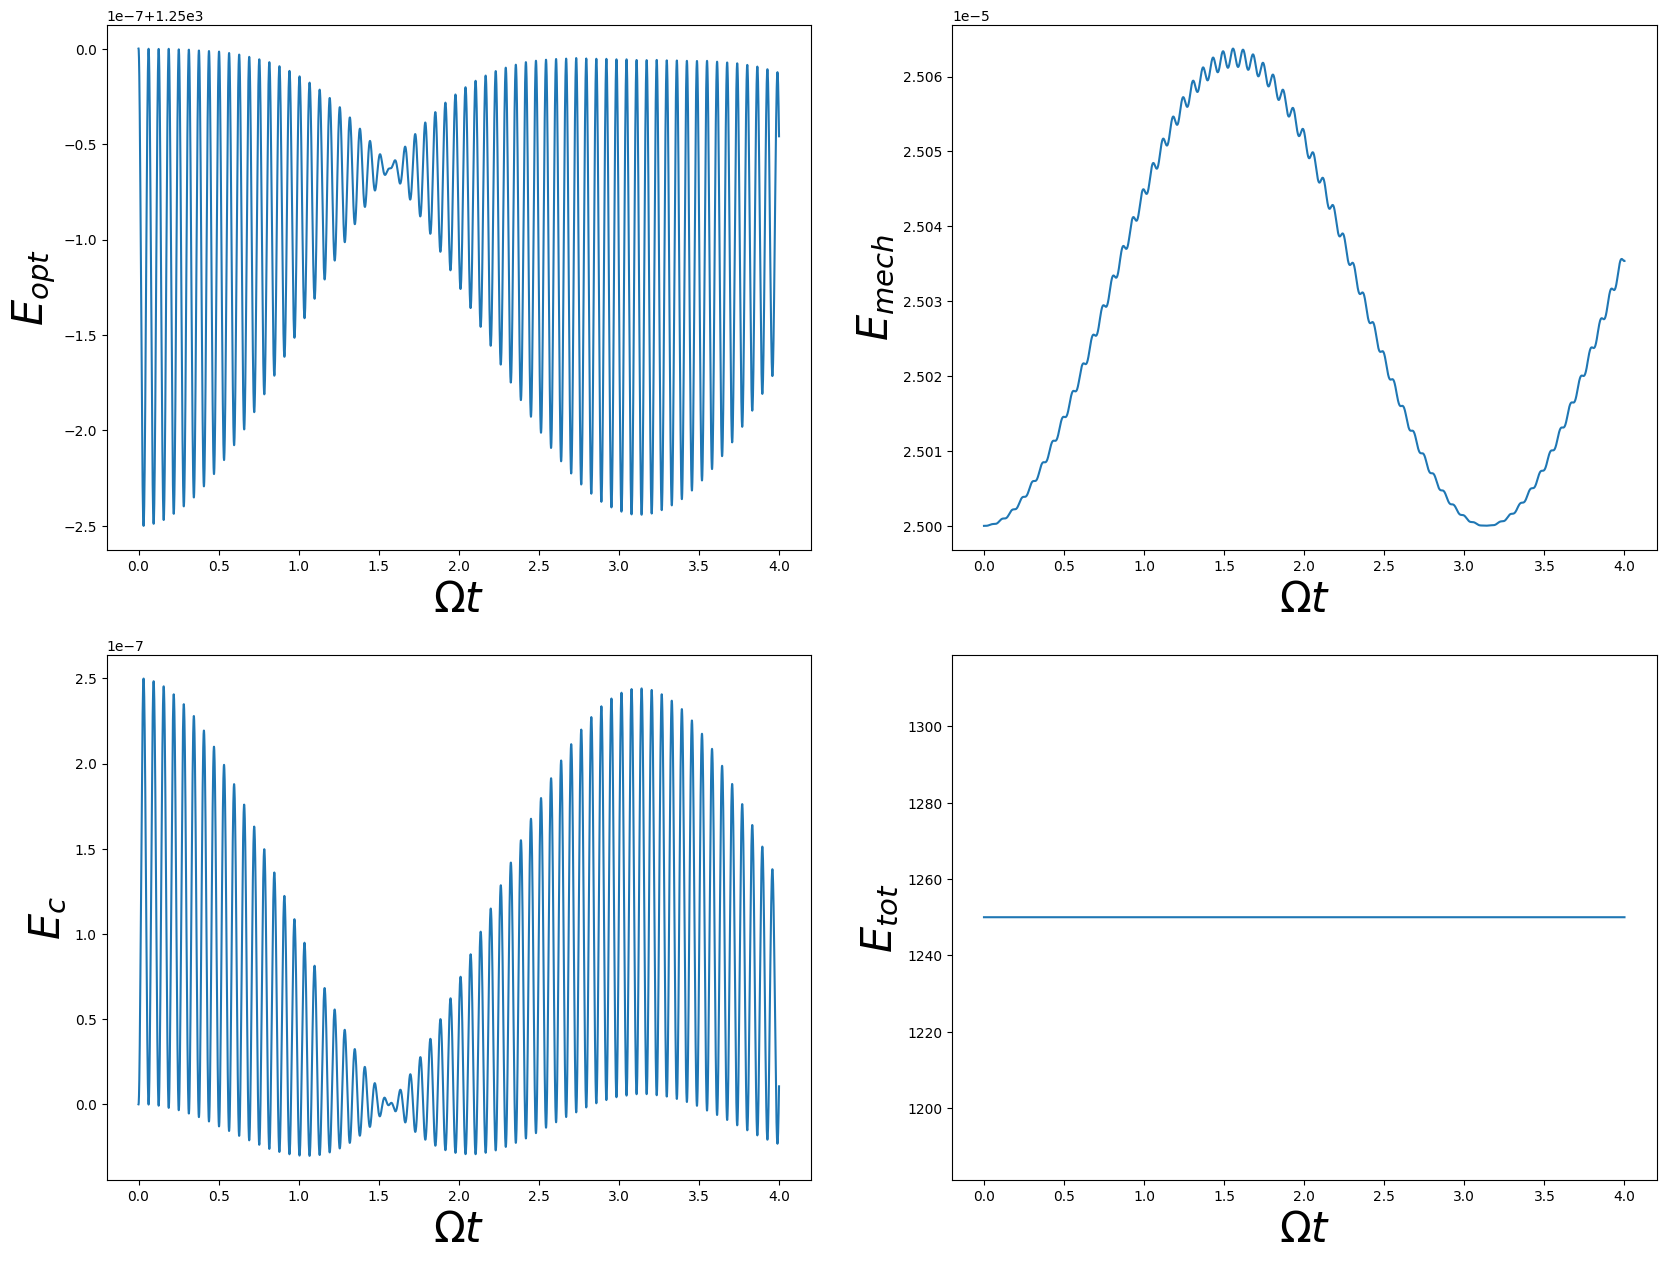

In [65]:
tf=4e0
P_c=0.01 ############### CRITICAL parameter
g_y=1e-1
N0=(P_c*del_omega)**3/(8*g_y**2)
print("N0=",N0)

file="real_stable_P_c={0}_g_y={1}_tf={2}".format(P_c,g_y,tf)


data = np.load(folder+file+".npz")
sol=data['sol']
t=data['t']
l=len(t)
g_z1,g_y,del_omega,N0=data['param']

# q_z,p_z,q_y,p_y,A0_p,A0_m,A1_p,A1_m=sol
# sigma_m=2*(A1_p*A0_m-A1_m*(A0_p+1))
# E_opt=del_omega*((1+A0_p)**2+A0_m**2)+0*N0*omega_1
# E_mech=(q_z**2+q_y**2+p_y**2+p_z**2)/4
# E_c=q_z*N0*g_z1*(A1_p**2+A1_m**2)/2+g_y*q_y*sigma_m/2
E_opt=sol[8]
E_mech=sol[9]
E_c=sol[10]


E_tot=E_opt+E_mech+E_c
E=[E_opt,E_mech,E_c,E_tot]
title='$g_y={0}\Omega  \: ; \: N_0={1} \: ; \: P_c={2}$'.format(g_y,N0,P_c)
label_list=["$E_{opt}$","$E_{mech}$","$E_{c}$","$E_{tot}$"]
fig, axs = plt.subplots(2, 2,figsize=(20,15))

for i in range(4):
    axs[i//2,i%2].plot(t,E[i])
    axs[i//2,i%2].set_ylabel(label_list[i],fontsize=30)
    axs[i//2,i%2].set_xlabel('$\Omega  t$',fontsize=30)
#     axs[i//2,i%2].legend(fontsize=12)
# fig.suptitle("$\\lambda={0} \: ; \:  \\nu={1} \: ; \: P_c={2}$".format(np.round(lam,2),np.round(nu,2),P_c),fontsize=30)
plt.show() 

N0= [ 12500. 100000.]


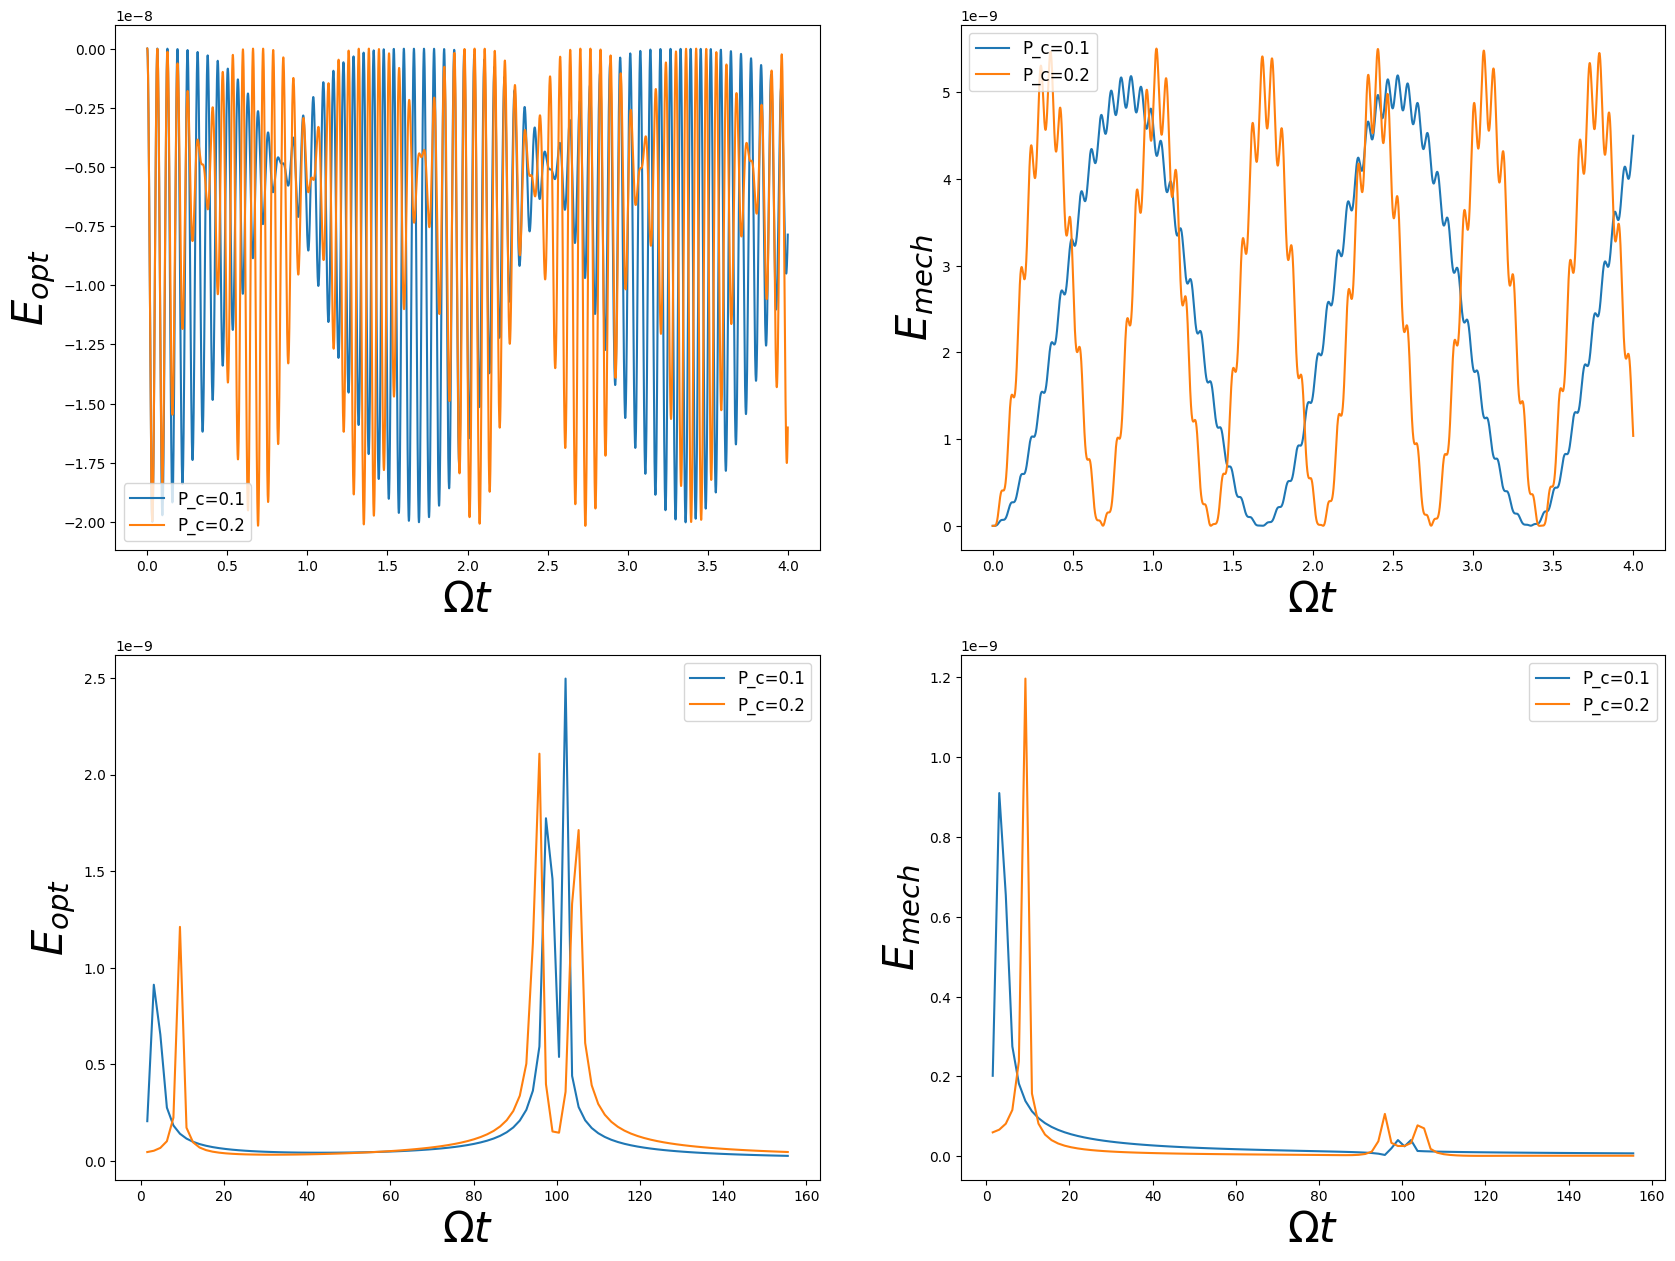

In [140]:
tf=4e0
omega_list=2*np.pi*np.arange(350)/tf

P_c_list=[0.1,0.2] ############### CRITICAL parameter
g_y=1e-1
N0_list=(np.array(P_c_list)*del_omega)**3/(8*g_y**2)
print("N0=",N0_list)
title='$g_y={0}\Omega  \: ; \: N_0={1} \: ; \: P_c={2}$'.format(g_y,N0,P_c)
fig, axs = plt.subplots(2, 2,figsize=(20,15))

sf,ef=1,100
for k,P_c in enumerate(P_c_list):
    file="real_stable_P_c={0}_g_y={1}_tf={2}".format(P_c,g_y,tf)
    data = np.load(folder+file+".npz")
    sol=data['sol']
    t=data['t']
    g_z1,g_y,del_omega,N0=data['param']
    N_step=len(t)
    E_opt=(sol[8]-sol[8][0])/N0
    E_mech=(sol[9]-sol[9][0])/N0

    E=[E_opt,E_mech]
    label_list=["$E_{opt}$","$E_{mech}$"]
    omega_list=(2*np.pi*np.arange(L//2+1)/tf)[sf:ef]

    for i in range(2):
        axs[0,i].plot(t,E[i][:len(t)],label="P_c={0}".format(P_c))
        axs[1,i].plot(omega_list,np.abs(np.fft.rfft(E[i]))[sf:ef]/N_step,label="P_c={0}".format(P_c))


for i in range(2):
    axs[0,i].set_ylabel(label_list[i],fontsize=30)
    axs[0,i].set_xlabel('$\Omega  t$',fontsize=30)
    axs[0,i].legend(fontsize=12)
    axs[1,i].set_ylabel(label_list[i],fontsize=30)
    axs[1,i].set_xlabel('$\Omega  t$',fontsize=30)
    axs[1,i].legend(fontsize=12)

    # fig.suptitle("$\\lambda={0} \: ; \:  \\nu={1} \: ; \: P_c={2}$".format(np.round(lam,2),np.round(nu,2),P_c),fontsize=30)
plt.show() 

2 5 174 19


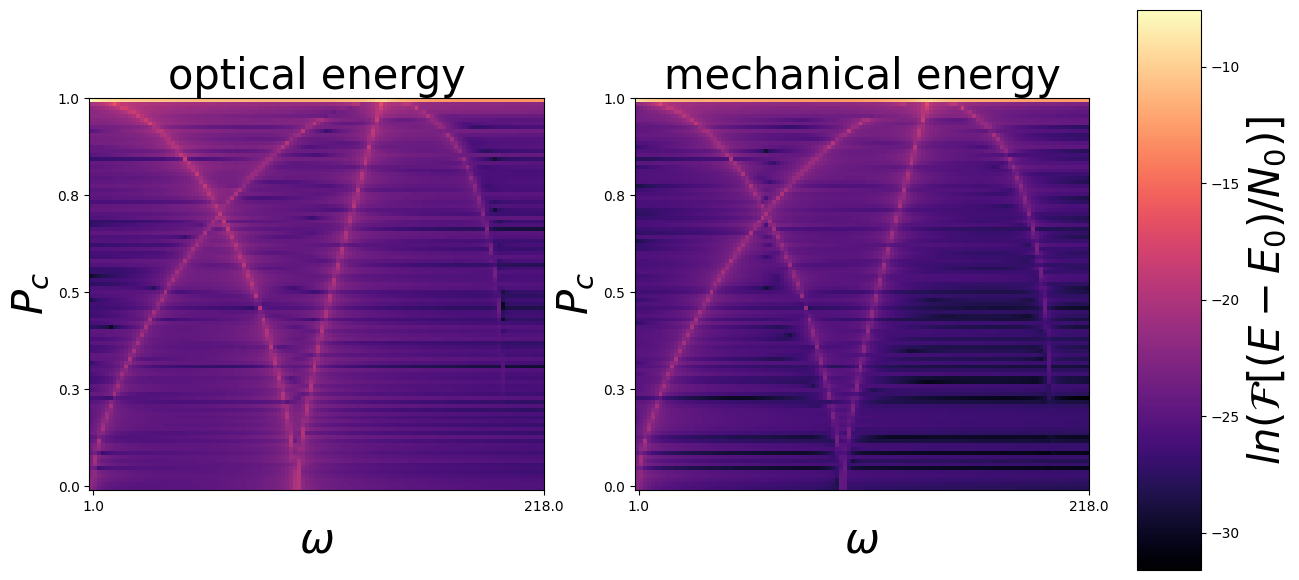

In [212]:
tf=1e1
omega_list=2*np.pi*np.arange(350)/tf
N_step=10000
N_grid=100
P_c_list=np.linspace(0.01,1,N_grid) ############### CRITICAL parameter
g_y=1e-1
N0_list=(np.array(P_c_list)*del_omega)**3/(8*g_y**2)
# print("N0=",N0_list)
title='$g_y={0}\Omega  \: ; \: N_0={1} \: ; \: P_c={2}$'.format(g_y,N0,P_c)
fig, axs = plt.subplots(1, 2,figsize=(16,8))

sf,ef,stp=2,350,3
omega_list=(2*np.pi*np.arange(N_step//2+1)/tf)[sf:ef:stp]

E_mech_mat=np.zeros((len(P_c_list),(ef-sf)//stp))
E_opt_mat=np.zeros((len(P_c_list),(ef-sf)//stp))

for k,P_c in enumerate(P_c_list):
    file="real_stable_P_c={0}_g_y={1}_tf={2}_sep_energy".format(np.round(P_c,4),g_y,tf)
    data = np.load(folder+file+".npz")
    sol=data['sol']
    t=data['t']
    g_z1,g_y,del_omega,N0=data['param']
    N_step=len(t)
    x1=sol[8]+sol[9]
    x2=sol[10]+sol[11]
    E_opt=(x1-x1[0])/N0
    E_mech=(x2-x2[0])/N0

    label_list=["$E_{opt}$","$E_{mech}$"]
    E_opt_mat[k]=np.log(np.abs(np.fft.rfft(E_opt))[sf:ef:stp]/N_step)
    E_mech_mat[k]=np.log(np.abs(np.fft.rfft(E_mech))[sf:ef:stp]/N_step)
    
E_fft=[E_opt_mat,E_mech_mat]

# find minimum of minima & maximum of maxima
minmin = np.min([np.min(E_mech_mat), np.min(E_opt_mat)])
maxmax = np.max([np.max(E_mech_mat), np.max(E_opt_mat)])
im1=axs[0].imshow(E_opt_mat,vmin=minmin,vmax=maxmax,cmap='magma',origin='lower',interpolation='none')
im2=axs[1].imshow(E_mech_mat,vmin=minmin,vmax=maxmax,cmap='magma',origin='lower',interpolation='none')
axs[0].set_title("optical energy",fontsize=30)
axs[1].set_title("mechanical energy",fontsize=30)
ly=E_fft[0].shape[0]//20
lx=E_fft[0].shape[1]//40
print(lx,ly,(ef-sf)//lx,(N_grid-1)//ly )
# print(len(omega_list[::(ef-sf)//lx]),len(P_c[::(N_grid-1)//ly]))
for i in range(2):
    axs[i].set_ylabel("$P_c$",fontsize=30)
    axs[i].set_xlabel('$\omega$',fontsize=30)
    axs[i].set_xticks(np.linspace(0,E_fft[i].shape[1]-1,lx) + 0.5, minor=False)
    axs[i].set_yticks(np.linspace(0,E_fft[i].shape[0]-1,ly) + 0.5, minor=False)
    axs[i].set_xticklabels(np.round(np.linspace(omega_list[0],omega_list[-1],lx),0), minor=False)
    axs[i].set_yticklabels(np.round(np.linspace(P_c_list[0],P_c_list[-1],ly),1), minor=False)

fig.subplots_adjust(right=0.75)
cbar_ax = fig.add_axes([0.78, 0.15, 0.04, 0.7])
cbar=fig.colorbar(im1, cax=cbar_ax)
cbar.set_label("$ln(\mathcal{F}[(E-E_0)/N_0)]$",fontsize=30,rotation=90)
# fig.suptitle("$\\lambda={0} \: ; \:  \\nu={1} \: ; \: P_c={2}$".format(np.round(lam,2),np.round(nu,2),P_c),fontsize=30)



plt.show() 

7 5 21 19


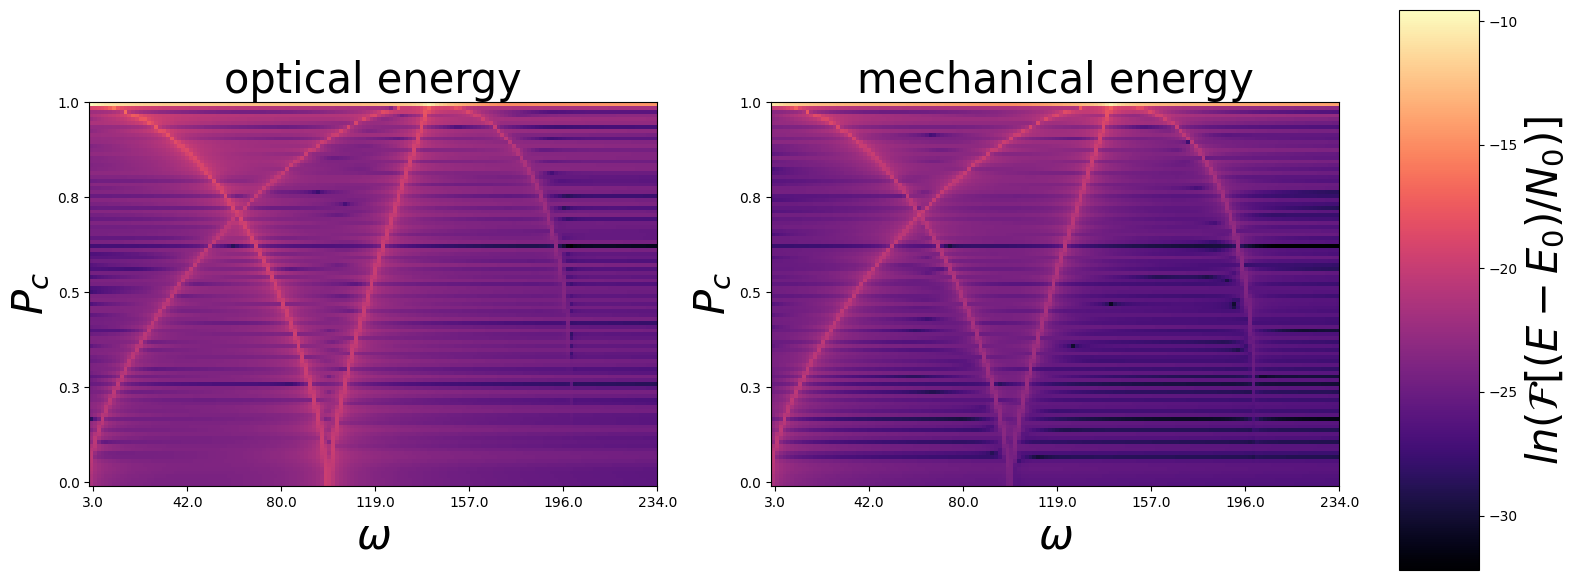

In [207]:
tf=4e0
omega_list=2*np.pi*np.arange(350)/tf
N_step=10000
N_grid=100
P_c_list=np.linspace(0.01,1,N_grid) ############### CRITICAL parameter
g_y=1e-1
N0_list=(np.array(P_c_list)*del_omega)**3/(8*g_y**2)
# print("N0=",N0_list)
title='$g_y={0}\Omega  \: ; \: N_0={1} \: ; \: P_c={2}$'.format(g_y,N0,P_c)
fig, axs = plt.subplots(1, 2,figsize=(20,8))

sf,ef=2,150
omega_list=(2*np.pi*np.arange(N_step//2+1)/tf)[sf:ef]

E_mech_mat=np.zeros((len(P_c_list),ef-sf))
E_opt_mat=np.zeros((len(P_c_list),ef-sf))

for k,P_c in enumerate(P_c_list):
    file="real_stable_P_c={0}_g_y={1}_tf={2}_sep_energy".format(np.round(P_c,4),g_y,tf)
    data = np.load(folder+file+".npz")
    sol=data['sol']
    t=data['t']
    g_z1,g_y,del_omega,N0=data['param']
    N_step=len(t)
    x1=sol[8]+sol[9]
    x2=sol[10]+sol[11]
    E_opt=(x1-x1[0])/N0
    E_mech=(x2-x2[0])/N0

    label_list=["$E_{opt}$","$E_{mech}$"]
    E_opt_mat[k]=np.log(np.abs(np.fft.rfft(E_opt))[sf:ef]/N_step)
    E_mech_mat[k]=np.log(np.abs(np.fft.rfft(E_mech))[sf:ef]/N_step)
    
E_fft=[E_opt_mat,E_mech_mat]

# find minimum of minima & maximum of maxima
minmin = np.min([np.min(E_mech_mat), np.min(E_opt_mat)])
maxmax = np.max([np.max(E_mech_mat), np.max(E_opt_mat)])
im1=axs[0].imshow(E_opt_mat,vmin=minmin,vmax=maxmax,cmap='magma',origin='lower',interpolation='none')
im2=axs[1].imshow(E_mech_mat,vmin=minmin,vmax=maxmax,cmap='magma',origin='lower',interpolation='none')
axs[0].set_title("optical energy",fontsize=30)
axs[1].set_title("mechanical energy",fontsize=30)
ly=E_fft[0].shape[0]//20
lx=E_fft[0].shape[1]//20
print(lx,ly,(ef-sf)//lx,(N_grid-1)//ly )
# print(len(omega_list[::(ef-sf)//lx]),len(P_c[::(N_grid-1)//ly]))
for i in range(2):
    axs[i].set_ylabel("$P_c$",fontsize=30)
    axs[i].set_xlabel('$\omega$',fontsize=30)
    axs[i].set_xticks(np.linspace(0,E_fft[i].shape[1]-1,lx) + 0.5, minor=False)
    axs[i].set_yticks(np.linspace(0,E_fft[i].shape[0]-1,ly) + 0.5, minor=False)
    axs[i].set_xticklabels(np.round(np.linspace(omega_list[0],omega_list[-1],lx),0), minor=False)
    axs[i].set_yticklabels(np.round(np.linspace(P_c_list[0],P_c_list[-1],ly),1), minor=False)

fig.subplots_adjust(right=0.75)
cbar_ax = fig.add_axes([0.78, 0.15, 0.04, 0.7])
cbar=fig.colorbar(im1, cax=cbar_ax)
cbar.set_label("$ln(\mathcal{F}[(E-E_0)/N_0)]$",fontsize=30,rotation=90)
# fig.suptitle("$\\lambda={0} \: ; \:  \\nu={1} \: ; \: P_c={2}$".format(np.round(lam,2),np.round(nu,2),P_c),fontsize=30)



plt.show() 

4 5 24 22


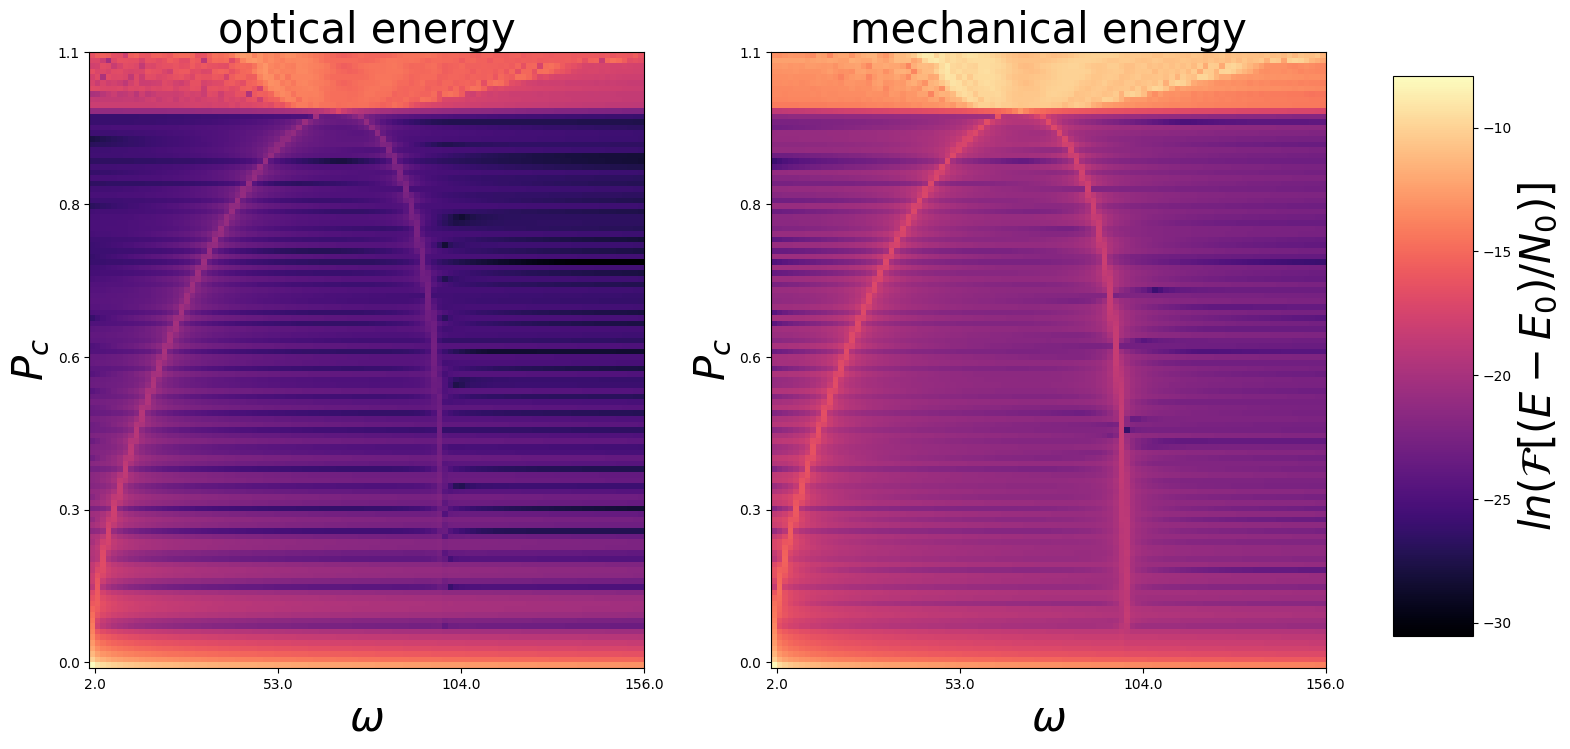

In [216]:
tf=4e0
omega_list=2*np.pi*np.arange(350)/tf
N_step=10000
N_grid=111
P_c_list=np.linspace(0,1.1,N_grid)[1:] ############### CRITICAL parameter
g_y=1e-1
N0_list=(np.array(P_c_list)*del_omega)**3/(8*g_y**2)
# print("N0=",N0_list)
title='$g_y={0}\Omega  \: ; \: N_0={1} \: ; \: P_c={2}$'.format(g_y,N0,P_c)
fig, axs = plt.subplots(1, 2,figsize=(20,8))

sf,ef=1,100
omega_list=(2*np.pi*np.arange(N_step//2+1)/tf)[sf:ef]

E_mech_mat=np.zeros((len(P_c_list),ef-sf))
E_opt_mat=np.zeros((len(P_c_list),ef-sf))

for k,P_c in enumerate(P_c_list):
    file="real_stable_P_c={0}_g_y={1}_tf={2}".format(np.round(P_c,4),g_y,tf)
    data = np.load(folder+file+".npz")
    sol=data['sol']
    t=data['t']
    g_z1,g_y,del_omega,N0=data['param']
    N_step=len(t)
    x1=sol[2]
    x2=sol[3]
    E_opt=(x1-x1[0])/N0
    E_mech=(x2-x2[0])/N0

    label_list=["$E_{opt}$","$E_{mech}$"]
    E_opt_mat[k]=np.log(np.abs(np.fft.rfft(E_opt))[sf:ef]/N_step)
    E_mech_mat[k]=np.log(np.abs(np.fft.rfft(E_mech))[sf:ef]/N_step)
    
E_fft=[E_opt_mat,E_mech_mat]

# find minimum of minima & maximum of maxima
minmin = np.min([np.min(E_mech_mat), np.min(E_opt_mat)])
maxmax = np.max([np.max(E_mech_mat), np.max(E_opt_mat)])
im1=axs[0].imshow(E_opt_mat,vmin=minmin,vmax=maxmax,cmap='magma',origin='lower',interpolation='none')
im2=axs[1].imshow(E_mech_mat,vmin=minmin,vmax=maxmax,cmap='magma',origin='lower',interpolation='none')
axs[0].set_title("optical energy",fontsize=30)
axs[1].set_title("mechanical energy",fontsize=30)
ly=E_fft[0].shape[0]//20
lx=E_fft[0].shape[1]//20
print(lx,ly,(ef-sf)//lx,(N_grid-1)//ly )
# print(len(omega_list[::(ef-sf)//lx]),len(P_c[::(N_grid-1)//ly]))
for i in range(2):
    axs[i].set_ylabel("$P_c$",fontsize=30)
    axs[i].set_xlabel('$\omega$',fontsize=30)
    axs[i].set_xticks(np.linspace(0,E_fft[i].shape[1]-1,lx) + 0.5, minor=False)
    axs[i].set_yticks(np.linspace(0,E_fft[i].shape[0]-1,ly) + 0.5, minor=False)
    axs[i].set_xticklabels(np.round(np.linspace(omega_list[0],omega_list[-1],lx),0), minor=False)
    axs[i].set_yticklabels(np.round(np.linspace(P_c_list[0],P_c_list[-1],ly),1), minor=False)

fig.subplots_adjust(right=0.75)
cbar_ax = fig.add_axes([0.78, 0.15, 0.04, 0.7])
cbar=fig.colorbar(im1, cax=cbar_ax)
cbar.set_label("$ln(\mathcal{F}[(E-E_0)/N_0)]$",fontsize=30,rotation=90)
# fig.suptitle("$\\lambda={0} \: ; \:  \\nu={1} \: ; \: P_c={2}$".format(np.round(lam,2),np.round(nu,2),P_c),fontsize=30)



plt.show() 

In [133]:
E_fft[0].shape

(110, 99)

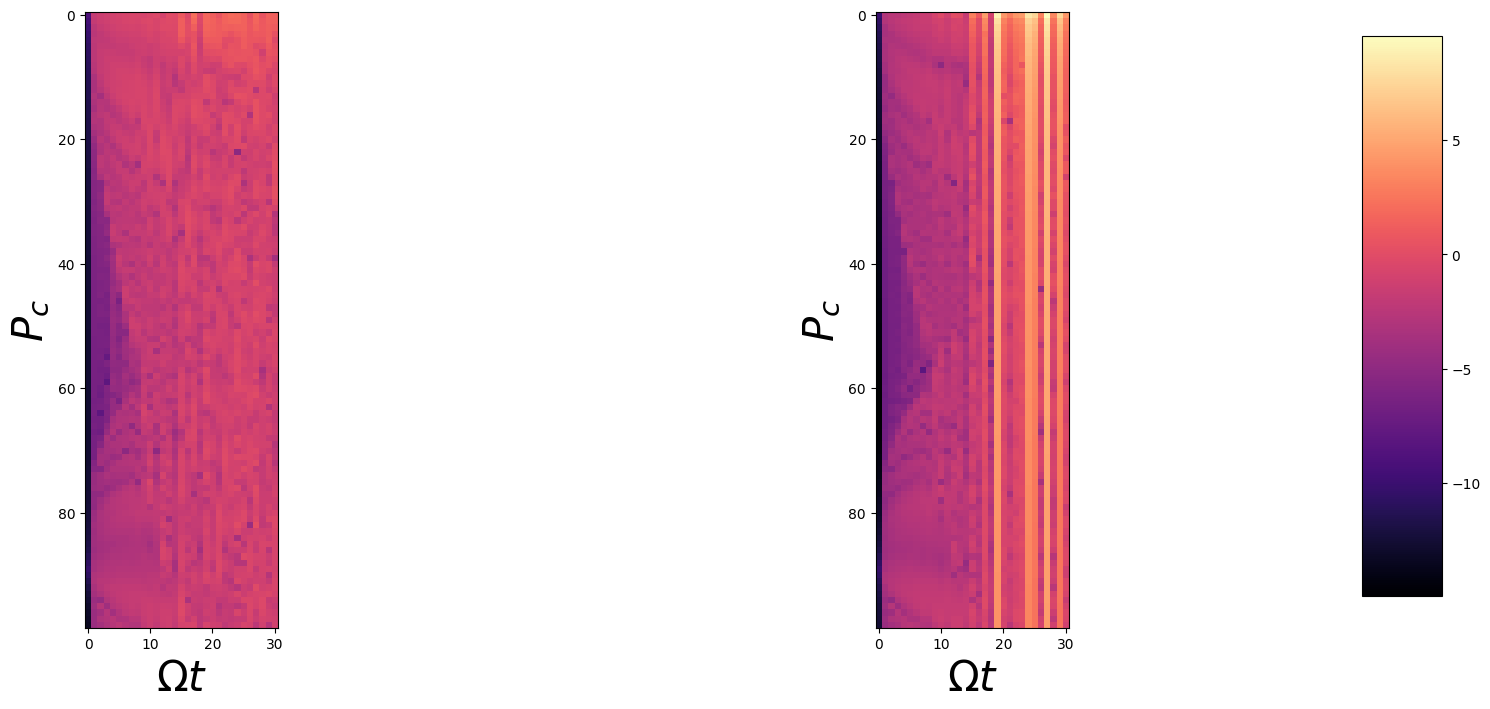

In [110]:
tf=4e0
omega_list=2*np.pi*np.arange(350)/tf
N_step=10000
N_grid=31
P_c_list=np.linspace(1,1.3,N_grid)
g_y=1e-1
N0_list=(np.array(P_c_list)*del_omega)**3/(8*g_y**2)
# print("N0=",N0_list)
title='$g_y={0}\Omega  \: ; \: N_0={1} \: ; \: P_c={2}$'.format(g_y,N0,P_c)
fig, axs = plt.subplots(1, 2,figsize=(20,8))

sf,ef=1,100
omega_list=(2*np.pi*np.arange(N_step//2+1)/tf)[sf:ef]

E_mech_mat=np.zeros((ef-sf,len(P_c_list)))
E_opt_mat=np.zeros((ef-sf,len(P_c_list)))

for k,P_c in enumerate(P_c_list):
    file="real_stable_P_c={0}_g_y={1}_tf={2}".format(np.round(P_c,4),g_y,tf)
    data = np.load(folder+file+".npz")
    sol=data['sol']
    t=data['t']
    g_z1,g_y,del_omega,N0=data['param']
    N_step=len(t)
    E_opt=(sol[8]-sol[8][0])/N0
    E_mech=(sol[9]-sol[9][0])/N0

    label_list=["$E_{opt}$","$E_{mech}$"]
    E_opt_mat[:,k]=np.log(np.abs(np.fft.rfft(E_opt))[sf:ef]/N_step)
    E_mech_mat[:,k]=np.log(np.abs(np.fft.rfft(E_mech))[sf:ef]/N_step)



# find minimum of minima & maximum of maxima
minmin = np.min([np.min(E_mech_mat), np.min(E_opt_mat)])
maxmax = np.max([np.max(E_mech_mat), np.max(E_opt_mat)])
im1=axs[0].imshow(E_opt_mat,vmin=minmin,vmax=maxmax,cmap='magma')
im2=axs[1].imshow(E_mech_mat,vmin=minmin,vmax=maxmax,cmap='magma')

for i in range(2):
    axs[i].set_ylabel("$P_c$",fontsize=30)
    axs[i].set_xlabel('$\Omega  t$',fontsize=30)
fig.subplots_adjust(right=0.85)
cbar_ax = fig.add_axes([0.88, 0.15, 0.04, 0.7])
fig.colorbar(im1, cax=cbar_ax)
# fig.suptitle("$\\lambda={0} \: ; \:  \\nu={1} \: ; \: P_c={2}$".format(np.round(lam,2),np.round(nu,2),P_c),fontsize=30)
plt.show() 

N0= [16637500. 21600000.]


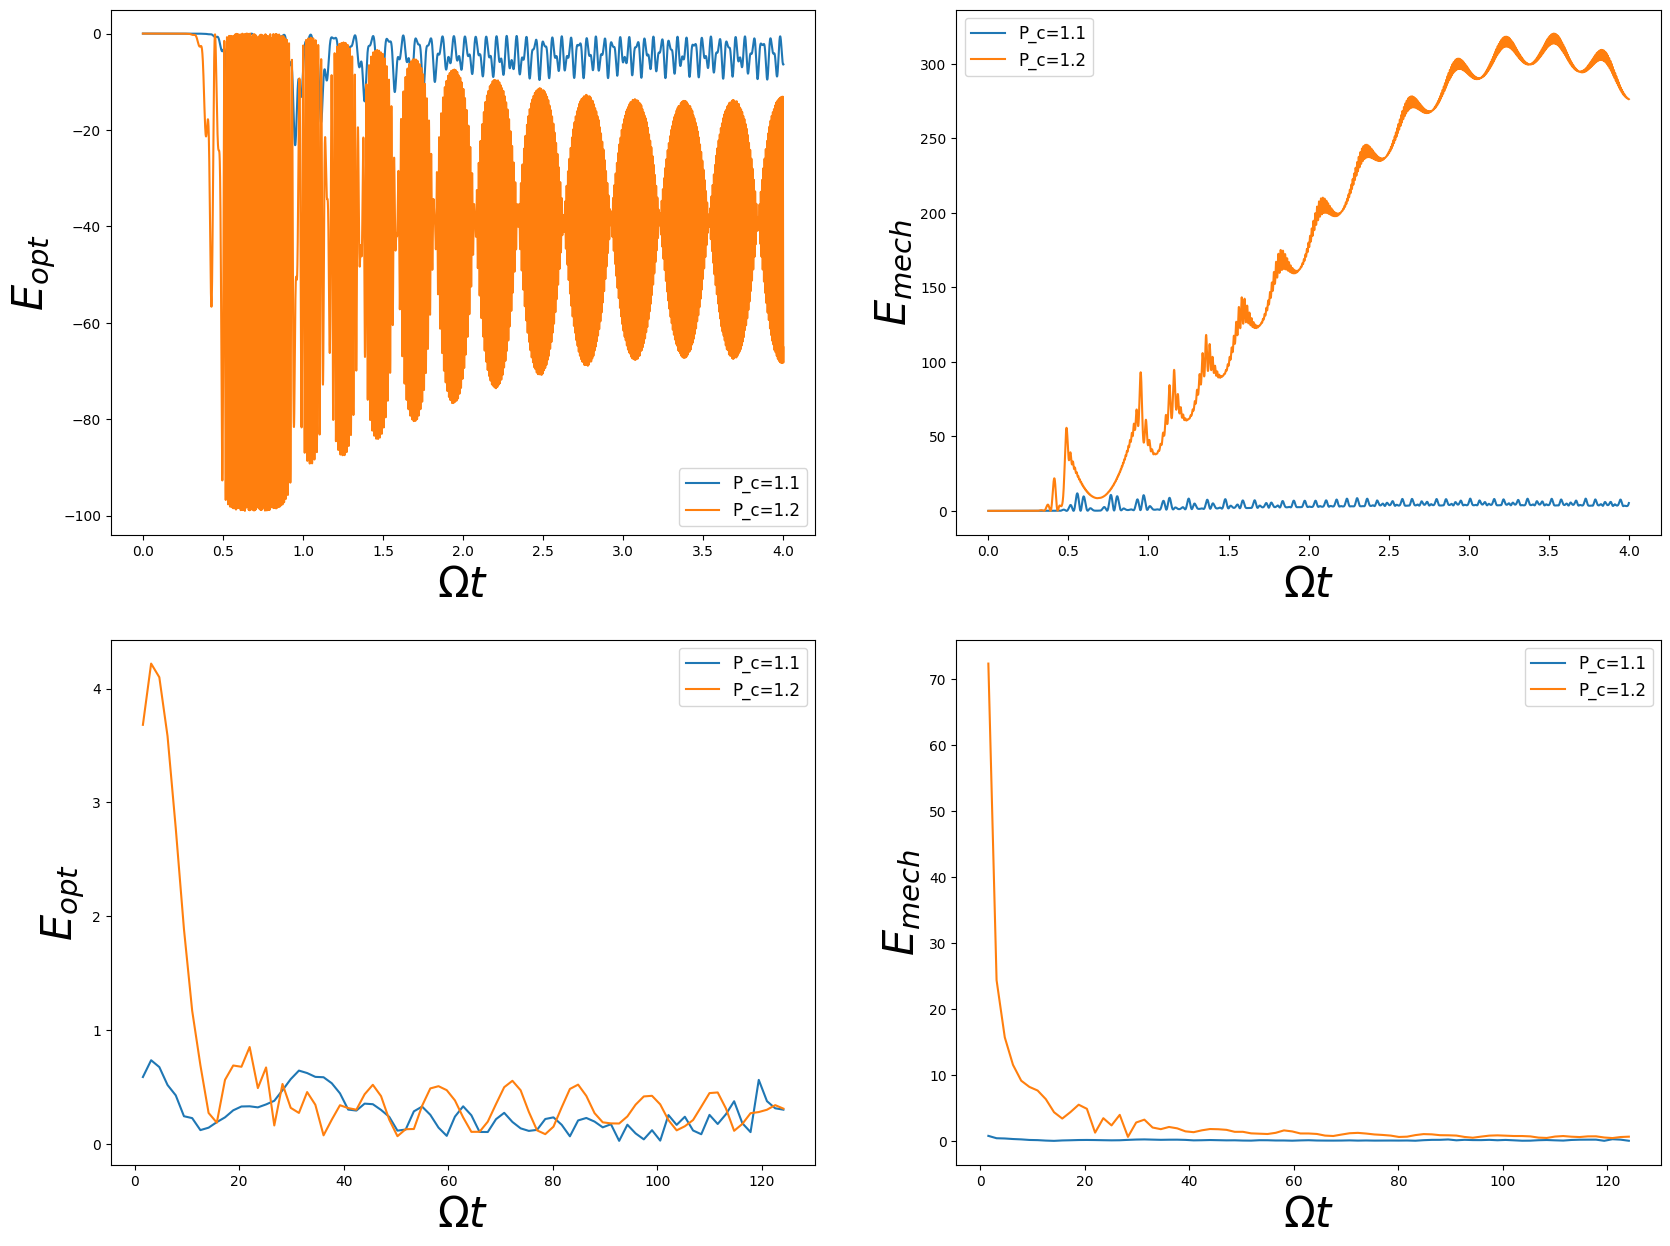

In [183]:
tf=4e0
omega_list=2*np.pi*np.arange(350)/tf

P_c_list=[1.1,1.2] ############### CRITICAL parameter
g_y=1e-1
N0_list=(np.array(P_c_list)*del_omega)**3/(8*g_y**2)
print("N0=",N0_list)
title='$g_y={0}\Omega  \: ; \: N_0={1} \: ; \: P_c={2}$'.format(g_y,N0,P_c)
fig, axs = plt.subplots(2, 2,figsize=(20,15))

sf,ef=1,80
for k,P_c in enumerate(P_c_list):
    file="real_stable_P_c={0}_g_y={1}_tf={2}".format(P_c,g_y,tf)
    data = np.load(folder+file+".npz")
    sol=data['sol']
    t=data['t']
    g_z1,g_y,del_omega,N0=data['param']
    N_step=len(t)
    E_opt=(sol[8]-sol[8][0])/N0
    E_mech=(sol[9]-sol[9][0])/N0

    E=[E_opt,E_mech]
    label_list=["$E_{opt}$","$E_{mech}$"]
    omega_list=(2*np.pi*np.arange(L//2+1)/tf)[sf:ef]

    for i in range(2):
        axs[0,i].plot(t,E[i][:len(t)],label="P_c={0}".format(P_c))
        axs[1,i].plot(omega_list,np.abs(np.fft.rfft(E[i]))[sf:ef]/N_step,label="P_c={0}".format(P_c))


for i in range(2):
    axs[0,i].set_ylabel(label_list[i],fontsize=30)
    axs[0,i].set_xlabel('$\Omega  t$',fontsize=30)
    axs[0,i].legend(fontsize=12)
    axs[1,i].set_ylabel(label_list[i],fontsize=30)
    axs[1,i].set_xlabel('$\Omega  t$',fontsize=30)
    axs[1,i].legend(fontsize=12)

    # fig.suptitle("$\\lambda={0} \: ; \:  \\nu={1} \: ; \: P_c={2}$".format(np.round(lam,2),np.round(nu,2),P_c),fontsize=30)
plt.show() 

In [ ]:
tf=4e0
omega_list=2*np.pi*np.arange(350)/tf

P_c_list=[0.2,0.1] ############### CRITICAL parameter
g_y=1e-1
N0_list=(np.array(P_c_list)*del_omega)**3/(8*g_y**2)
print("N0=",N0_list)
title='$g_y={0}\Omega  \: ; \: N_0={1} \: ; \: P_c={2}$'.format(g_y,N0,P_c)
fig, axs = plt.subplots(2, 2,figsize=(20,15))

sf,ef=1,100
for k,P_c in enumerate(P_c_list):
    file="real_stable_P_c={0}_g_y={1}_tf={2}".format(P_c,g_y,tf)
    data = np.load(folder+file+".npz")
    sol=data['sol']
    t=data['t']
    g_z1,g_y,del_omega,N0=data['param']
    N_step=len(t)
    E_opt=(sol[8]-sol[8][0])/N0
    E_mech=(sol[9]-sol[9][0])/N0

    E=[E_opt,E_mech]
    label_list=["$E_{opt}$","$E_{mech}$"]
    omega_list=(2*np.pi*np.arange(L//2+1)/tf)[sf:ef]

    for i in range(2):
        axs[0,i].plot(t,E[i][:len(t)],label="P_c={0}".format(P_c))
        axs[1,i].plot(omega_list,np.abs(np.fft.rfft(E[i]))[sf:ef]/N_step,label="P_c={0}".format(P_c))


for i in range(2):
    axs[0,i].set_ylabel(label_list[i],fontsize=30)
    axs[0,i].set_xlabel('$\Omega  t$',fontsize=30)
    axs[0,i].legend(fontsize=12)
    axs[1,i].set_ylabel(label_list[i],fontsize=30)
    axs[1,i].set_xlabel('$\Omega  t$',fontsize=30)
    axs[1,i].legend(fontsize=12)

    # fig.suptitle("$\\lambda={0} \: ; \:  \\nu={1} \: ; \: P_c={2}$".format(np.round(lam,2),np.round(nu,2),P_c),fontsize=30)
plt.show() 